In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium
from folium.plugins import HeatMap

In [3]:
file_path = r'C:\Users\harsh\AccidentsBig.csv'
dtype_spec = {
    'Column8': 'str',
    'Column10': 'str',
    'Column28': 'str',
    'Column29': 'str'
}
data = pd.read_csv(file_path, dtype=dtype_spec, low_memory=False)
data.head()

,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date
0,1.0,78.610393,14.724026,1.0,2.0,1.0,1.0,3.0,17:42,12.0,...,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002849,04-01-2018
1,2.0,78.534042,14.762353,1.0,3.0,1.0,1.0,4.0,17:36,12.0,...,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909,05-01-2018
2,3.0,78.470877,14.745606,1.0,3.0,2.0,1.0,5.0,00:15,12.0,...,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002857,06-01-2018
3,4.0,78.557994,14.667128,1.0,3.0,1.0,1.0,6.0,10:35,12.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002840,07-01-2018
4,5.0,78.576431,14.703443,1.0,3.0,1.0,1.0,2.0,21:13,12.0,...,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,E01002863,10-01-2018


In [5]:
data.columns

Index(['Accident_Index', 'longitude', 'latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Date'],
      dtype='object')

In [8]:
data.isnull().sum()
data.dropna(subset=['Date', 'Time', 'Accident_Severity', 'latitude', 'longitude', 'Weather_Conditions'], inplace=True)
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d-%m-%Y %H:%M')
data['Hour'] = data['DateTime'].dt.hour
data['DayOfWeek'] = data['DateTime'].dt.dayofweek
data['Month'] = data['DateTime'].dt.month
data['Year'] = data['DateTime'].dt.year

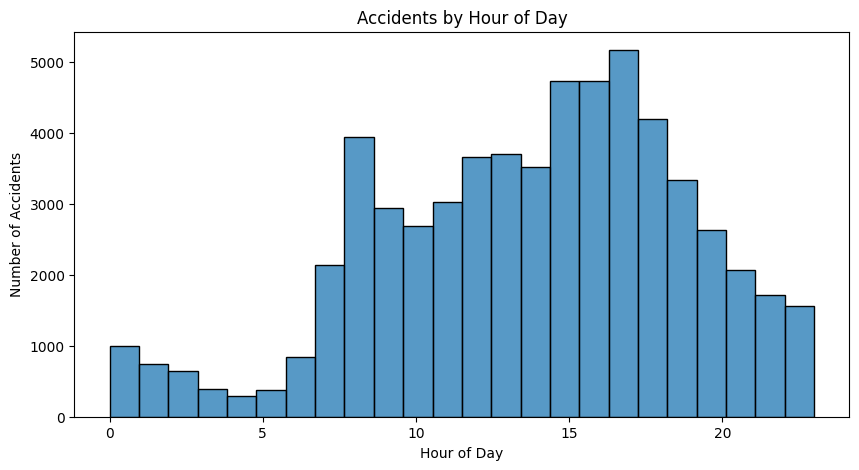

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Hour'], bins=24, kde=False)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

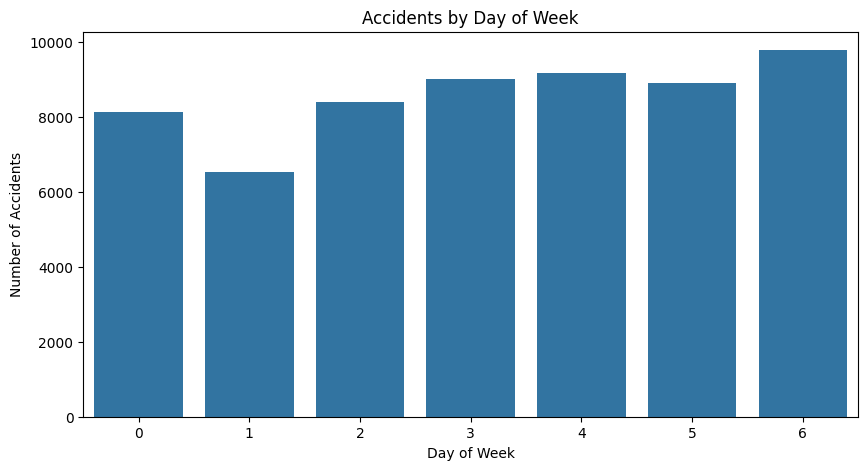

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x='DayOfWeek', data=data)
plt.title('Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()

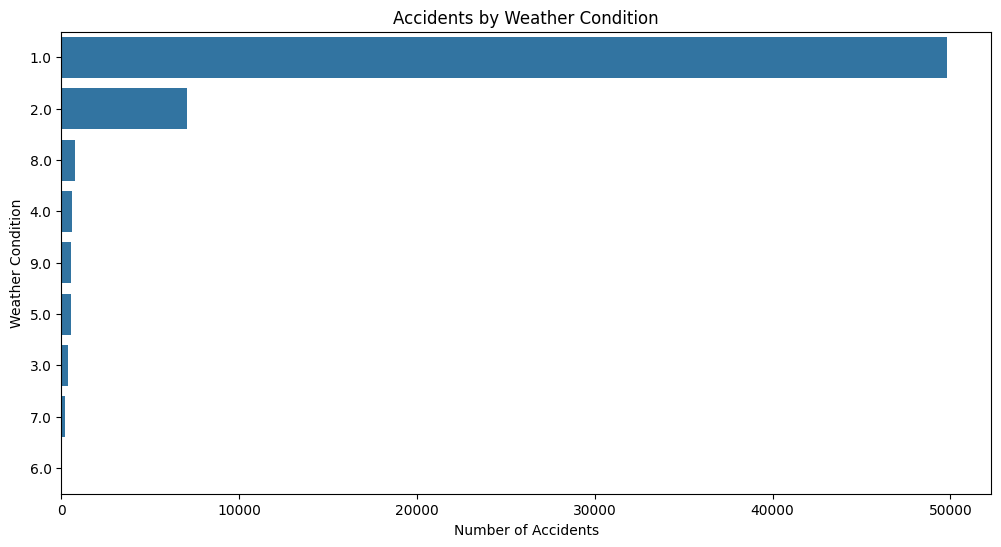

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Weather_Conditions', data=data, order=data['Weather_Conditions'].value_counts().index)
plt.title('Accidents by Weather Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

In [21]:
sample_data = data.sample(n=10000, random_state=1)
m = folium.Map(location=[sample_data['latitude'].mean(), sample_data['longitude'].mean()], zoom_start=5)
heat_data = [[row['latitude'], row['longitude']] for index, row in sample_data.iterrows()]
HeatMap(heat_data).add_to(m)
output_path = 'C:/Users/harsh/Documents/accident_heatmap.html'
m.save(output_path)
print(f'Heatmap saved to {output_path}')

Heatmap saved to C:/Users/harsh/Documents/accident_heatmap.html


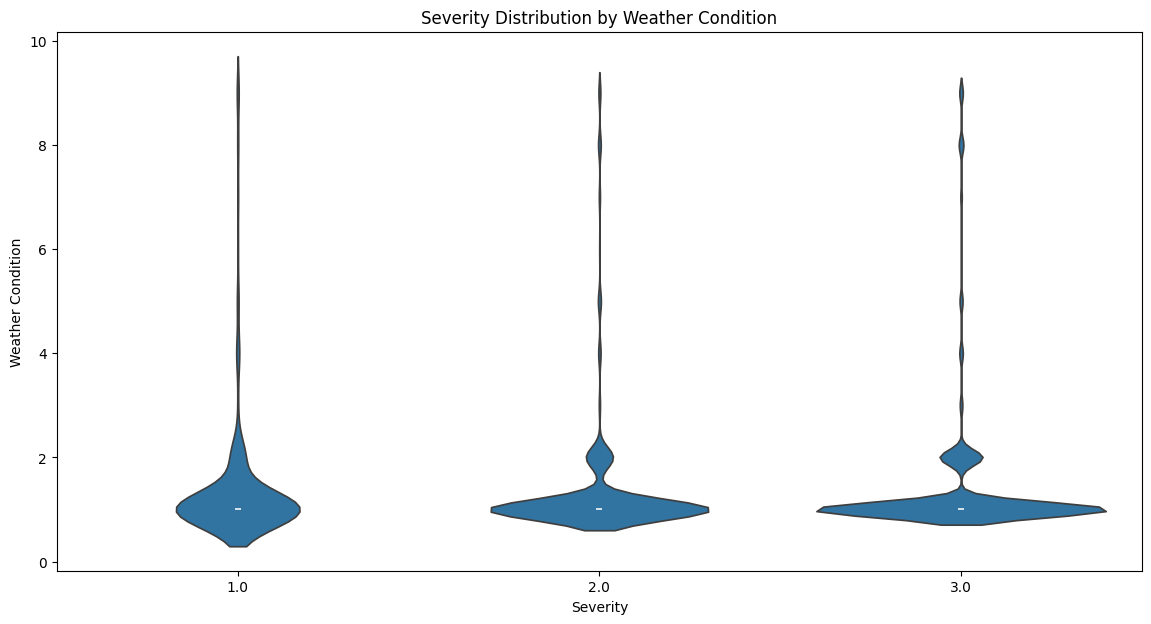

In [24]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='Accident_Severity', y='Weather_Conditions', data=data)
plt.title('Severity Distribution by Weather Condition')
plt.xlabel('Severity')
plt.ylabel('Weather Condition')
plt.show()

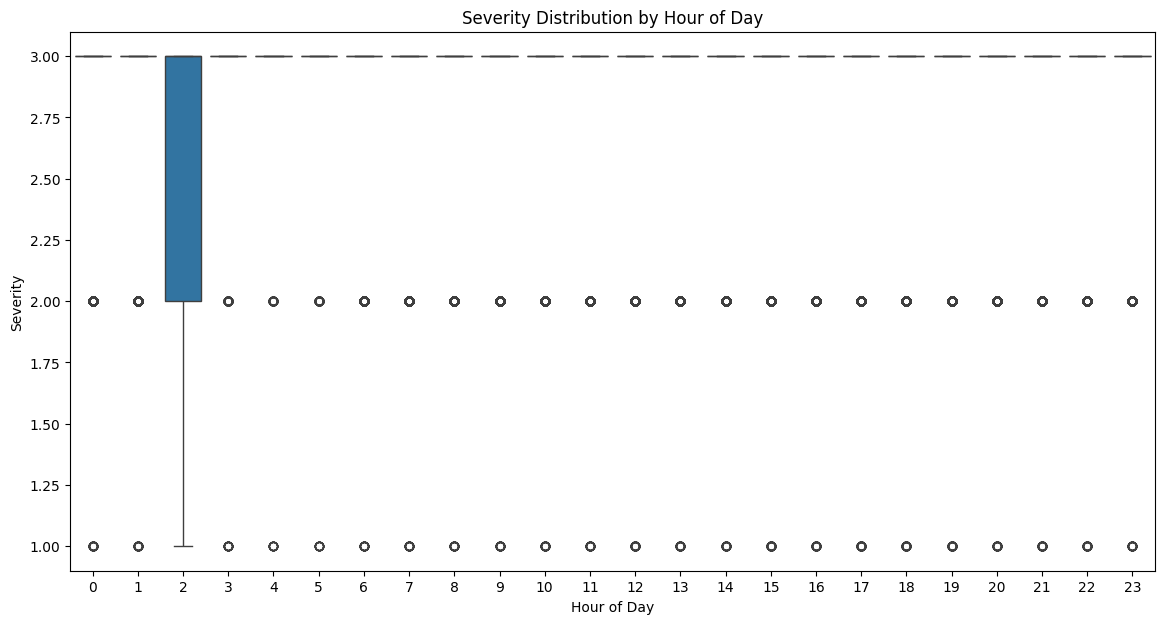

In [23]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Hour', y='Accident_Severity', data=data)
plt.title('Severity Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Severity')
plt.show()